In [1]:
import matplotlib.pyplot as plt
import json

In [3]:
# Load the data
with open("../vicuna-eval/review_output.jsonl", "r") as file:
    data = [json.loads(line) for line in file]

# Extract scores
scores_sum = {}
for entry in data:
    question_id = entry['question_id']
    assistant1_score, assistant2_score = entry['score']

    if question_id not in scores_sum:
        scores_sum[question_id] = {'assistant1': 0, 'assistant2': 0}

    scores_sum[question_id]['assistant1'] += assistant1_score
    scores_sum[question_id]['assistant2'] += assistant2_score

question_ids = list(scores_sum.keys())
assistant1_scores = [scores_sum[qid]['assistant1'] for qid in question_ids]
assistant2_scores = [scores_sum[qid]['assistant2'] for qid in question_ids]


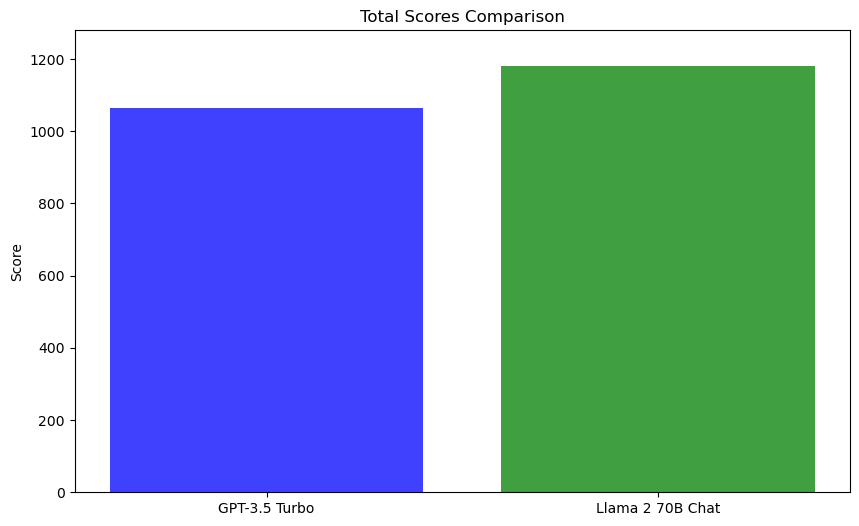

In [4]:
# Bar Chart: Comparing the total scores of GPT-3.5 Turbo and Llama 2 70B Chat
labels = ['GPT-3.5 Turbo', 'Llama 2 70B Chat']
values = [sum(assistant1_scores), sum(assistant2_scores)]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green'], alpha=0.75)
plt.title('Total Scores Comparison')
plt.ylabel('Score')
plt.ylim(0, max(values) + 100)
plt.show()

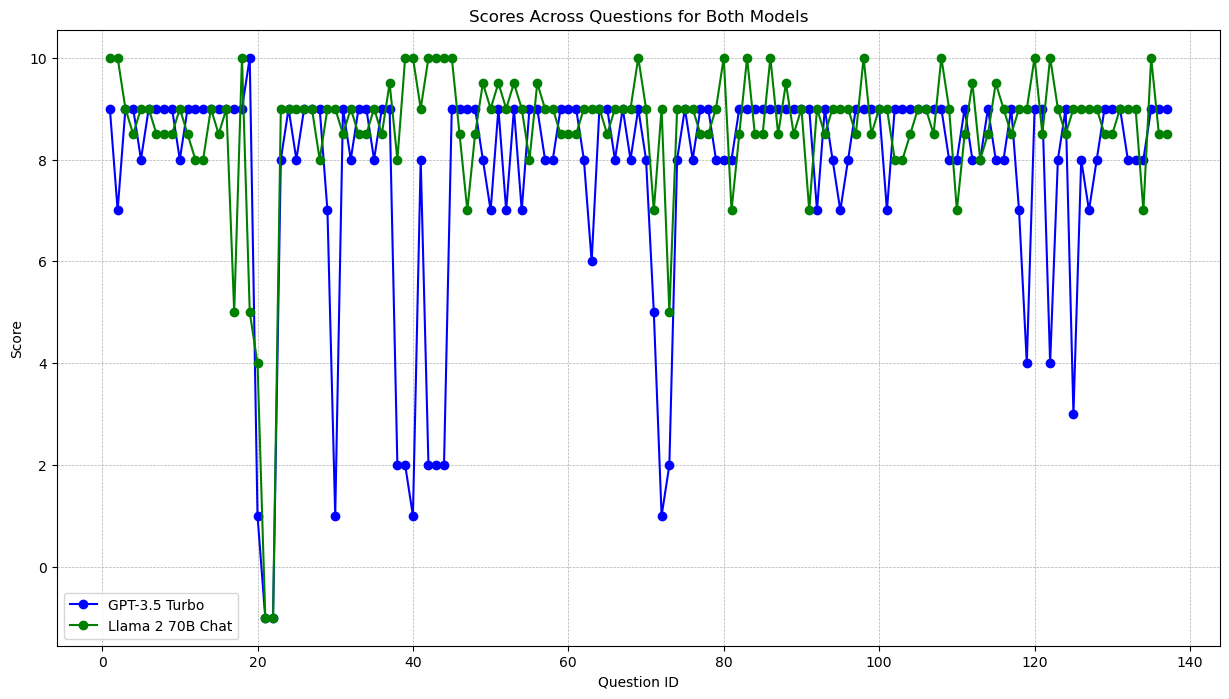

In [5]:
# Line Chart: Scores for each question for GPT-3.5 Turbo and Llama 2 70B Chat
plt.figure(figsize=(15, 8))
plt.plot(question_ids, assistant1_scores, label='GPT-3.5 Turbo', marker='o', color='blue')
plt.plot(question_ids, assistant2_scores, label='Llama 2 70B Chat', marker='o', color='green')
plt.title('Scores Across Questions for Both Models')
plt.xlabel('Question ID')
plt.ylabel('Score')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

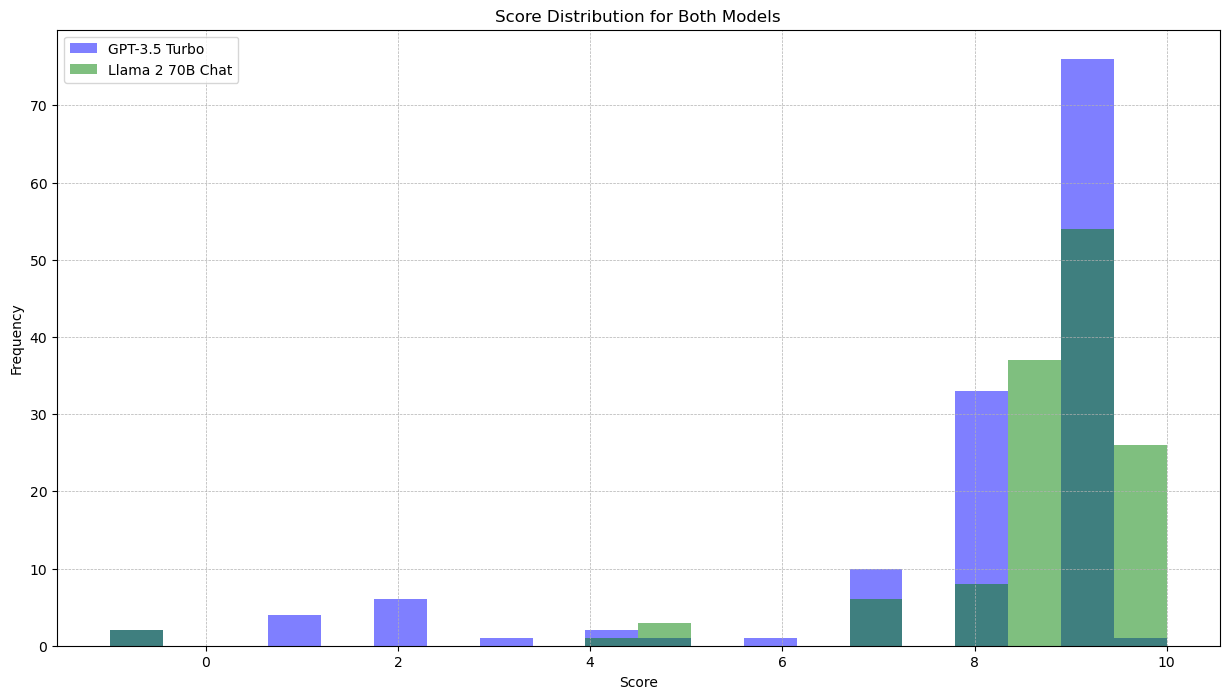

In [6]:
# Histogram: Distribution of scores for GPT-3.5 Turbo and Llama 2 70B Chat
plt.figure(figsize=(15, 8))
plt.hist(assistant1_scores, bins=20, alpha=0.5, label='GPT-3.5 Turbo', color='blue')
plt.hist(assistant2_scores, bins=20, alpha=0.5, label='Llama 2 70B Chat', color='green')
plt.title('Score Distribution for Both Models')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()